In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, log_loss, plot_confusion_matrix, roc_curve, auc, plot_roc_curve)

In [26]:
db_treino = pd.read_csv('treino.csv')
db_teste = pd.read_csv('test.csv')


In [27]:
db_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
db_treino.shape

(891, 12)

In [29]:
db_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
print(db_treino.isnull().sum().sort_values)

<bound method Series.sort_values of PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64>


In [31]:
print(db_teste.isnull().sum().sort_values)

<bound method Series.sort_values of PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64>


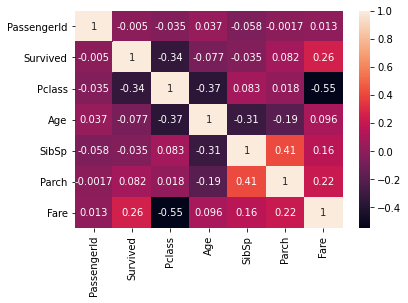

In [32]:
_=sns.heatmap(db_treino.corr(),annot=True)

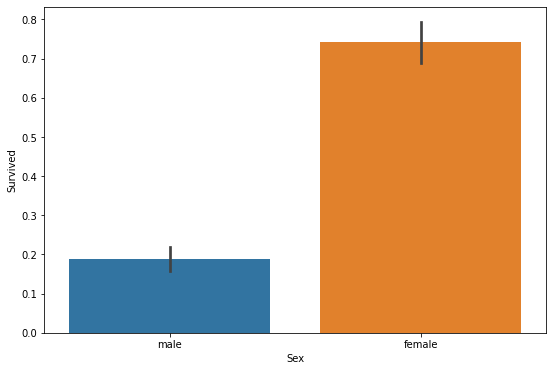

In [33]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sex',y='Survived',data=db_treino)

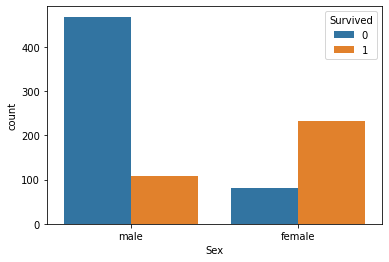

In [34]:
sns.countplot('Sex',hue='Survived',data=db_treino)

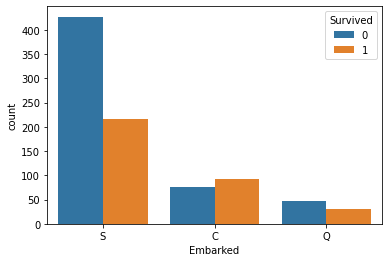

In [35]:
sns.countplot('Embarked',hue='Survived',data=db_treino)

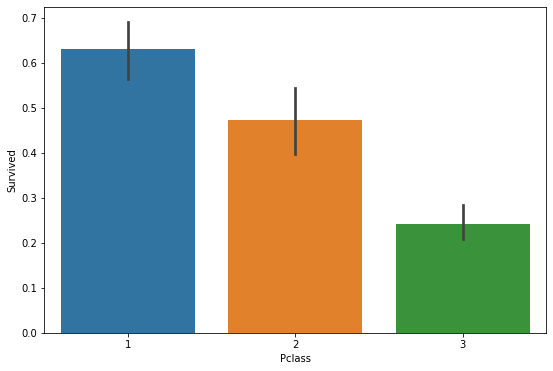

In [36]:
plt.figure(figsize=(9,6))
sns.barplot(x='Pclass', y='Survived', data=db_treino)

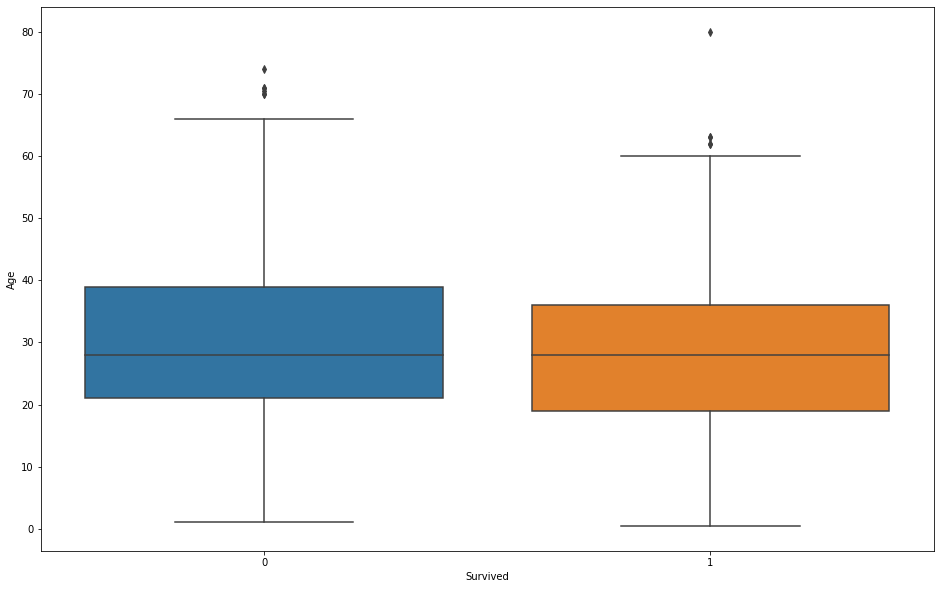

In [37]:
plt.figure(figsize=(16, 10))
_ = sns.boxplot(x=db_treino['Survived'], y=db_treino['Age'])


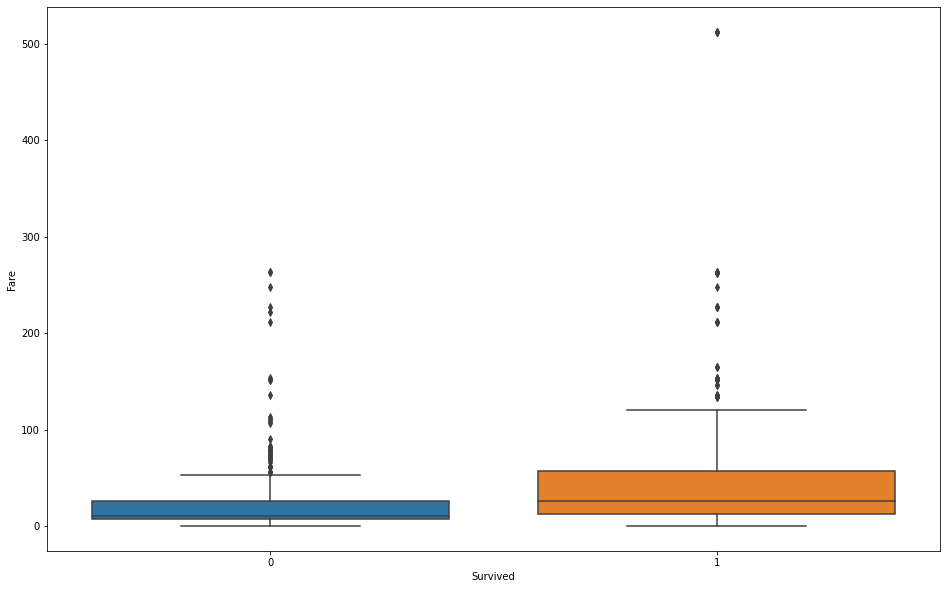

In [38]:
plt.figure(figsize=(16, 10))
_ = sns.boxplot(x=db_treino['Survived'], y=db_treino['Fare'])

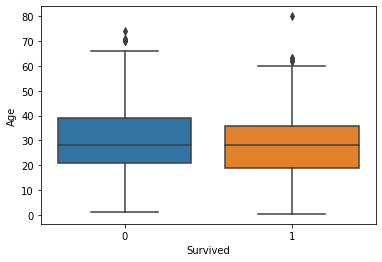

In [39]:
sns.boxplot(x='Survived',y='Age',data=db_treino)

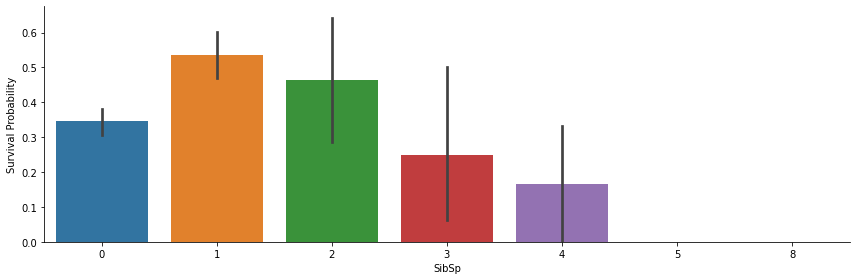

In [40]:
sns.catplot(x="SibSp", y="Survived", kind="bar", data=db_treino, height=4, aspect=3).set_ylabels("Survival Probability")

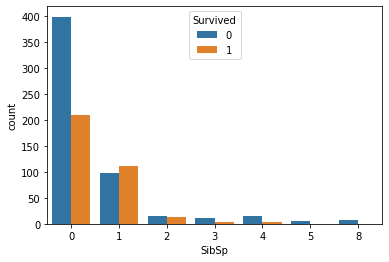

In [41]:
sns.countplot('SibSp',hue='Survived',data=db_treino)

In [42]:
data_FE=[db_treino,db_teste]
title_list = list()
for data in data_FE :
    for title in data['Name']:
        title = title.split('.')[0].split(',')[1]
        title_list.append(title)
    
    data['Title'] = title_list
    title_list = list()

In [43]:
    print(db_treino['Title'].value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Don               1
 Capt              1
 Sir               1
 Jonkheer          1
 Mme               1
 Ms                1
 the Countess      1
 Lady              1
Name: Title, dtype: int64


In [44]:
db_treino['Title'] = db_treino['Title'].replace([ ' Don', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Others')
db_treino['Title'].value_counts()

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Others      14
 Dr          7
 Rev         6
Name: Title, dtype: int64

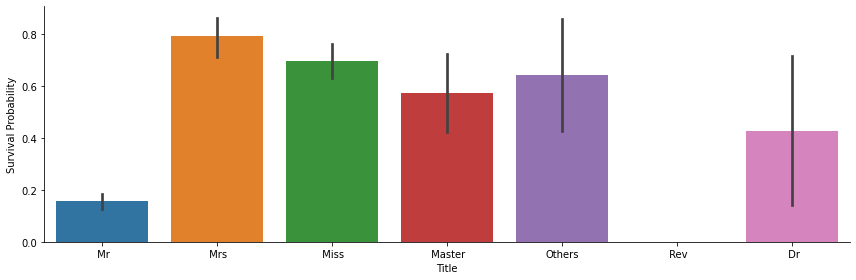

In [45]:
sns.catplot(x="Title", y="Survived", kind="bar", data=db_treino, height=4, aspect=3).set_ylabels("Survival Probability")

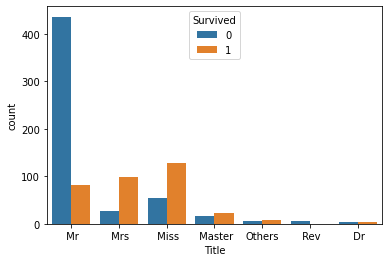

In [46]:
sns.countplot('Title',hue='Survived',data=db_treino)

In [47]:
db_teste['Title'] = db_teste['Title'].replace([ ' Dona',' Don', ' Mme',' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], 'Others')
db_teste['Title'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
Others       4
 Rev         2
 Dr          1
Name: Title, dtype: int64

In [50]:
db_treino['Cabin_Letter'] = db_treino['Cabin'].apply(lambda x: str(x)[0])

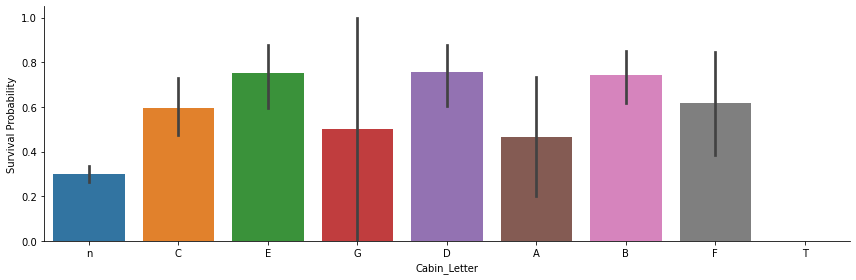

In [52]:
sns.catplot(x="Cabin_Letter", y="Survived", kind="bar", data=db_treino, height=4, aspect=3).set_ylabels("Survival Probability")

In [84]:
def get_size(df):
    if df['SibSp'] + df['Parch'] + 1 == 1:
        return 'Single'
    else: 
        return 'With Family'
    
for data in data_FE:
    data['FamilySize'] = data.apply(get_size,axis=1)

In [85]:
db_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Single
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Single


In [86]:
db_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Single
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,With Family
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Single
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Single
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,With Family


In [87]:
from pprint import pprint

for index,data in enumerate(data_FE):
    social_class_list = list()
    
    for classe in data['Pclass']:
        if classe == 1:
            social_class = "First Class"
        if classe == 2:
            social_class = "Second Class"
        if classe == 3:    
            social_class = "Third Class"
            
        social_class_list.append(social_class)
        
    data["Class"] = social_class_list
       

In [88]:
db_treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,With Family,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,With Family,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Single,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,With Family,First Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Single,Third Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Single,Second Class
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Single,First Class
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,With Family,Third Class
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Single,First Class


In [89]:
db_teste

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Single,Third Class
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,With Family,Third Class
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Single,Second Class
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Single,Third Class
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,With Family,Third Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,Single,Third Class
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others,Single,First Class
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Single,Third Class
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,Single,Third Class


In [90]:
db_treino['Class'].value_counts()

Third Class     491
First Class     216
Second Class    184
Name: Class, dtype: int64

In [91]:
db_treino=db_treino.drop(['Name','Ticket','Cabin'], axis=1)
db_teste=db_teste.drop(['Name','Ticket','Cabin'], axis=1)

In [92]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
db_treino_numeric = db_treino.select_dtypes(include=numerics).copy()
db_teste_numeric= db_teste.select_dtypes(include=numerics).copy()


In [93]:
db_treino_numeric=db_treino_numeric.drop(["PassengerId"], axis=1)
db_teste_numeric=db_teste_numeric.drop(["PassengerId"],axis=1)


In [94]:
db_treino_numeric.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [95]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(db_teste_numeric)
db_teste_numeric_no_null = imputer.transform(db_teste_numeric)
teste = pd.DataFrame(db_teste_numeric_no_null , columns=db_teste_numeric.columns)
teste=teste.drop(['SibSp','Parch','Pclass'], axis=1)
teste.head()
print(teste.isnull().sum().sort_values)

<bound method Series.sort_values of Age     0
Fare    0
dtype: int64>


In [96]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(db_treino_numeric)
db_treino_numeric_no_null = imputer.transform(db_treino_numeric)
treino = pd.DataFrame(db_treino_numeric_no_null , columns=db_treino_numeric.columns)
treino=treino.drop(['SibSp','Parch','Pclass'], axis=1)
treino.head()

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500


In [97]:
#db_treino_label=db_treino["PassengerId"]
#db_treino_label=pd.DataFrame(db_treino_label)

db_treino_cat = db_treino[['Embarked','Title','FamilySize','Class','Sex']]
db_treino_cat_encoded = pd.get_dummies(db_treino_cat)
#db_treino_cat_encoded=db_treino_label.join(db_treino_cat_encoded)
db_treino_cat_encoded.head()

,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev,Title_Others,FamilySize_Single,FamilySize_With Family,Class_First Class,Class_Second Class,Class_Third Class,Sex_female,Sex_male
0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0
3,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1


In [98]:
#db_teste_label=db_teste["PassengerId"]
#db_teste_label=pd.DataFrame(db_teste_label)
db_teste_cat = db_teste[[ 'Embarked','Title','FamilySize','Class','Sex']]
db_teste_cat_encoded = pd.get_dummies(db_teste_cat)
#db_teste_cat_encoded=db_teste_label.join(db_teste_cat_encoded)
db_teste_cat_encoded.head()

,Embarked_C,Embarked_Q,Embarked_S,Title_ Dr,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_ Rev,Title_Others,FamilySize_Single,FamilySize_With Family,Class_First Class,Class_Second Class,Class_Third Class,Sex_female,Sex_male
0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0
2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0


In [99]:
db_treino_concat=db_treino_cat_encoded.join(treino)
db_teste_concat=db_teste_cat_encoded.join(teste)

In [100]:
db_treino_concat.head()
db_treino_concat.shape

(891, 20)

In [101]:
print(db_treino_concat.isnull().sum().sort_values)

<bound method Series.sort_values of Embarked_C                0
Embarked_Q                0
Embarked_S                0
Title_ Dr                 0
Title_ Master             0
Title_ Miss               0
Title_ Mr                 0
Title_ Mrs                0
Title_ Rev                0
Title_Others              0
FamilySize_Single         0
FamilySize_With Family    0
Class_First Class         0
Class_Second Class        0
Class_Third Class         0
Sex_female                0
Sex_male                  0
Survived                  0
Age                       0
Fare                      0
dtype: int64>


In [102]:
print(db_teste_concat.isnull().sum().sort_values)

<bound method Series.sort_values of Embarked_C                0
Embarked_Q                0
Embarked_S                0
Title_ Dr                 0
Title_ Master             0
Title_ Miss               0
Title_ Mr                 0
Title_ Mrs                0
Title_ Rev                0
Title_Others              0
FamilySize_Single         0
FamilySize_With Family    0
Class_First Class         0
Class_Second Class        0
Class_Third Class         0
Sex_female                0
Sex_male                  0
Age                       0
Fare                      0
dtype: int64>


In [103]:
db_teste_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
Embarked_C                418 non-null uint8
Embarked_Q                418 non-null uint8
Embarked_S                418 non-null uint8
Title_ Dr                 418 non-null uint8
Title_ Master             418 non-null uint8
Title_ Miss               418 non-null uint8
Title_ Mr                 418 non-null uint8
Title_ Mrs                418 non-null uint8
Title_ Rev                418 non-null uint8
Title_Others              418 non-null uint8
FamilySize_Single         418 non-null uint8
FamilySize_With Family    418 non-null uint8
Class_First Class         418 non-null uint8
Class_Second Class        418 non-null uint8
Class_Third Class         418 non-null uint8
Sex_female                418 non-null uint8
Sex_male                  418 non-null uint8
Age                       418 non-null float64
Fare                      418 non-null float64
dtypes: float64(2), uint8(17)
memory

In [104]:
db_teste_concat.columns

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Dr', 'Title_ Master',
       'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Title_Others',
       'FamilySize_Single', 'FamilySize_With Family', 'Class_First Class',
       'Class_Second Class', 'Class_Third Class', 'Sex_female', 'Sex_male',
       'Age', 'Fare'],
      dtype='object')

In [105]:
db_treino_concat.columns

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Dr', 'Title_ Master',
       'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Title_Others',
       'FamilySize_Single', 'FamilySize_With Family', 'Class_First Class',
       'Class_Second Class', 'Class_Third Class', 'Sex_female', 'Sex_male',
       'Survived', 'Age', 'Fare'],
      dtype='object')

In [106]:
X =db_treino_concat.drop(columns=['Survived'])
y = db_treino_concat['Survived']

In [107]:
X.columns

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Dr', 'Title_ Master',
       'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_ Rev', 'Title_Others',
       'FamilySize_Single', 'FamilySize_With Family', 'Class_First Class',
       'Class_Second Class', 'Class_Third Class', 'Sex_female', 'Sex_male',
       'Age', 'Fare'],
      dtype='object')

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)

In [109]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)


In [110]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [111]:
def accuracy(yt, yp):
    return (yp==yt).mean()

accuracy(y_test, y_pred)

0.7873134328358209

In [112]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
rf_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
print("%.4f" % random_forest.oob_score_)

98.23 %
0.7945


In [113]:
pd.concat((pd.DataFrame(db_teste_concat.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(random_forest.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
17,Fare,0.254535
18,NaN,0.246564
15,Sex_male,0.096502
6,Title_ Mrs,0.083282
16,Age,0.082049
14,Sex_female,0.052865
7,Title_ Rev,0.028593
12,Class_Second Class,0.027851
13,Class_Third Class,0.020483
2,Title_ Dr,0.018795


In [114]:
from sklearn.metrics import roc_auc_score

roc_value = roc_auc_score(y_test, rf_prediction)
roc_value

0.7745238095238096

In [115]:
db_teste_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
Embarked_C                418 non-null uint8
Embarked_Q                418 non-null uint8
Embarked_S                418 non-null uint8
Title_ Dr                 418 non-null uint8
Title_ Master             418 non-null uint8
Title_ Miss               418 non-null uint8
Title_ Mr                 418 non-null uint8
Title_ Mrs                418 non-null uint8
Title_ Rev                418 non-null uint8
Title_Others              418 non-null uint8
FamilySize_Single         418 non-null uint8
FamilySize_With Family    418 non-null uint8
Class_First Class         418 non-null uint8
Class_Second Class        418 non-null uint8
Class_Third Class         418 non-null uint8
Sex_female                418 non-null uint8
Sex_male                  418 non-null uint8
Age                       418 non-null float64
Fare                      418 non-null float64
dtypes: float64(2), uint8(17)
memory

In [116]:
#ids = X['PassengerId'].astype('int32')
dt_pred =  dt.predict(db_teste_concat)

In [117]:
db_teste_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
Embarked_C                418 non-null uint8
Embarked_Q                418 non-null uint8
Embarked_S                418 non-null uint8
Title_ Dr                 418 non-null uint8
Title_ Master             418 non-null uint8
Title_ Miss               418 non-null uint8
Title_ Mr                 418 non-null uint8
Title_ Mrs                418 non-null uint8
Title_ Rev                418 non-null uint8
Title_Others              418 non-null uint8
FamilySize_Single         418 non-null uint8
FamilySize_With Family    418 non-null uint8
Class_First Class         418 non-null uint8
Class_Second Class        418 non-null uint8
Class_Third Class         418 non-null uint8
Sex_female                418 non-null uint8
Sex_male                  418 non-null uint8
Age                       418 non-null float64
Fare                      418 non-null float64
dtypes: float64(2), uint8(17)
memory

In [118]:
rf_prediction = random_forest.predict(db_teste_concat)

In [119]:
rf_prediction.size

418

In [120]:
submission = pd.DataFrame({ 'PassengerId' : db_teste["PassengerId"], 'Survived': dt_pred.astype('int64') })
submission.to_csv('submission3.csv', index=False)

In [242]:
submission = pd.DataFrame({ 'PassengerId' : db_teste["PassengerId"], 'Survived': rf_prediction.astype('int64') })
submission.to_csv('submission4.csv', index=False)

In [243]:
rf_prediction

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [244]:
dt_pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.